In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Import and Preprocess data

In [102]:
data = pd.read_csv("./concrete_data.csv")
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [103]:
X, y = data.drop("concrete_compressive_strength", axis=1), pd.DataFrame(data["concrete_compressive_strength"])

<Axes: >

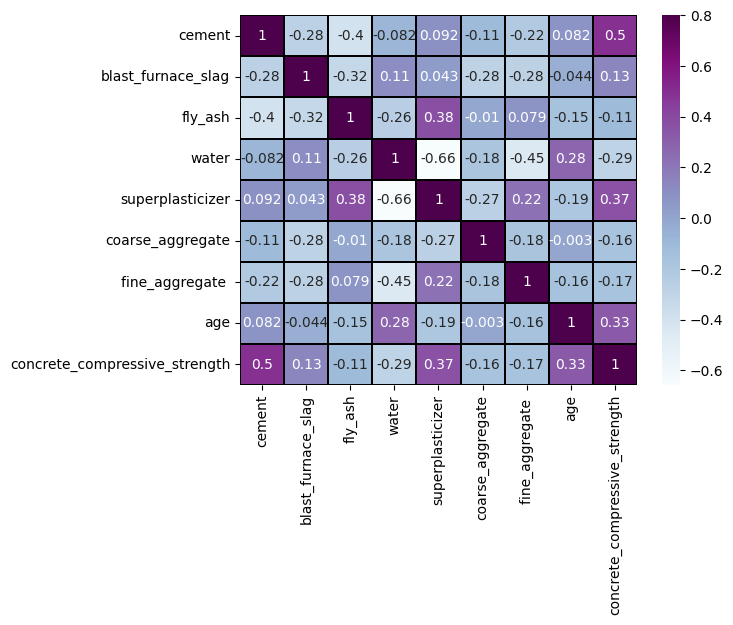

In [104]:
sns.heatmap(data.corr(), annot=True, cmap="BuPu", linecolor="Black", linewidths=0.01, vmax=0.8)

In [105]:
X.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')

#### check for VIF

In [106]:
indep = data[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,cement,15.456717
1,blast_furnace_slag,3.329127
2,fly_ash,4.147833
3,water,82.157569
4,superplasticizer,5.471094
5,coarse_aggregate,84.955779
6,fine_aggregate,72.790995
7,age,1.699459


remove coarse aggregate

In [107]:
indep = data[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'fine_aggregate ', 'age']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,cement,14.484331
1,blast_furnace_slag,3.298301
2,fly_ash,3.962976
3,water,72.092772
4,superplasticizer,5.395416
5,fine_aggregate,48.624992
6,age,1.699343


remove water

In [108]:
indep = data[['cement', 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'fine_aggregate ', 'age']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,cement,9.422097
1,blast_furnace_slag,2.080877
2,fly_ash,2.943716
3,superplasticizer,2.939900
4,fine_aggregate,14.219268
5,age,1.577309


remove fine aggregate

In [109]:
indep = data[['cement', 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age']]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,cement,2.819482
1,blast_furnace_slag,1.526264
2,fly_ash,1.879115
3,superplasticizer,2.921784
4,age,1.550374


we are finally left with these features

In [110]:
X = data[['cement', 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age']]

## Model Training

In [111]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [112]:
X_train.shape

(824, 5)

In [113]:
y_train.shape

(206, 5)

In [114]:
def multi_lr(X_train, y_train, X_test, y_test):
    print(X_train.shape, y_train.shape)
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    Mean_absolute_error = mean_absolute_error(y_test,y_pred)
    Mean_squared_error = mean_squared_error(y_test,y_pred)
    R_squared = r2_score(y_test, y_pred)

    return {
        "Accuracy": lr.score(X_train, y_train),
        "MAE": Mean_absolute_error,
        "MSE": Mean_squared_error,
        "R2": R_squared
    }

In [115]:
def poly_reg(X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree=3).fit(X_train)
    X_train_transformed = poly.transform(X_train)
    X_test_transformed = poly.transform(X_test)

    lr = LinearRegression().fit(X_train_transformed, y_train)
    y_pred = lr.predict(X_test_transformed)

    Mean_absolute_error = mean_absolute_error(y_test,y_pred)
    Mean_squared_error = mean_squared_error(y_test,y_pred)
    R_squared = r2_score(y_test, y_pred)

    return {
        "Accuracy": lr.score(X_train_transformed, y_train),
        "MAE": Mean_absolute_error,
        "MSE": Mean_squared_error,
        "R2": R_squared
    }

In [116]:
def ridgecv(X_train, y_train, X_test, y_test):
    ridge_cv = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]).fit(X_train, y_train)
    y_pred = ridge_cv.predict(X_test)

    Mean_absolute_error = mean_absolute_error(y_test,y_pred)
    Mean_squared_error = mean_squared_error(y_test,y_pred)
    R_squared = r2_score(y_test, y_pred)

    return {
        "Accuracy": ridge_cv.score(X_train, y_train),
        "MAE": Mean_absolute_error,
        "MSE": Mean_squared_error,
        "R2": R_squared
    }

In [117]:
def lassocv(X_train, y_train, X_test, y_test):
    lasso_cv = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]).fit(X_train, y_train)
    y_pred = lasso_cv.predict(X_test)

    Mean_absolute_error = mean_absolute_error(y_test,y_pred)
    Mean_squared_error = mean_squared_error(y_test,y_pred)
    R_squared = r2_score(y_test, y_pred)

    return {
        "Accuracy": lasso_cv.score(X_train, y_train),
        "MAE": Mean_absolute_error,
        "MSE": Mean_squared_error,
        "R2": R_squared
    }

In [118]:
print(multi_lr(X_train, X_test, y_train, y_test))
print(poly_reg(X_train, X_test, y_train, y_test))
print(ridgecv(X_train, X_test, y_train, y_test))
print(lassocv(X_train, X_test, y_train, y_test))

(824, 5) (824, 1)
{'Accuracy': 0.5972212833796744, 'MAE': 9.394373054460017, 'MSE': 142.24563827687294, 'R2': 0.4543590495818811}
{'Accuracy': 0.8506932040946119, 'MAE': 6.007259748948706, 'MSE': 68.10256408874581, 'R2': 0.7387649403845677}
{'Accuracy': 0.5972212680585021, 'MAE': 9.394340469718147, 'MSE': 142.24131488018125, 'R2': 0.45437563372680434}
{'Accuracy': 0.5972199366389147, 'MAE': 9.393414754769717, 'MSE': 142.17876499089562, 'R2': 0.4546155692457545}


c:\Users\devbh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
